In [3]:
%matplotlib inline
import pandas as pd

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000


In [34]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
3383162,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24
3383163,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24
3383164,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26
3383165,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17
3383166,Bye Bye Blue Bird,1999,Rosa ? R?gvu,actress,Pensionatv?rtinde,NaN


### What are the ten most common movie names of all time?

In [9]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
Paradise                10
Love                    10
Temptation              10
She                     10
Honeymoon               10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [11]:
titles[titles.year // 10 == 193].year.value_counts().head(3)

1937    1189
1936    1130
1938    1116
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [20]:
titles['decade'] = (titles.year // 10 * 10)

title     object
year       int64
decade     int64
dtype: object

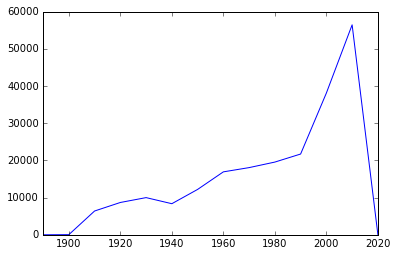

In [25]:
titles.decade.value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

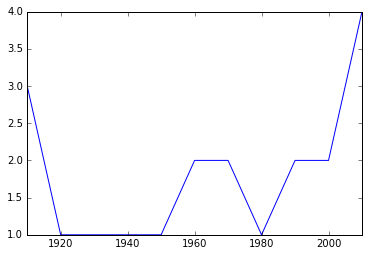

In [26]:
titles[titles.title == 'Hamlet'].decade.value_counts().sort_index().plot()

### Plot the number of "Rustler" characters in each decade of the history of film.

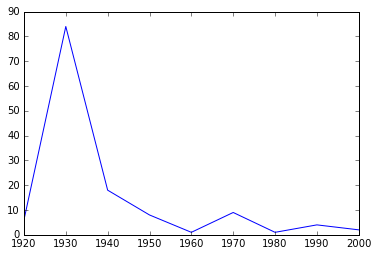

In [61]:
cast['decade'] = (cast.year // 10 * 10)
cast[cast.character == 'Rustler'].decade.value_counts().sort_index().plot()

### Plot the number of "Hamlet" characters each decade.

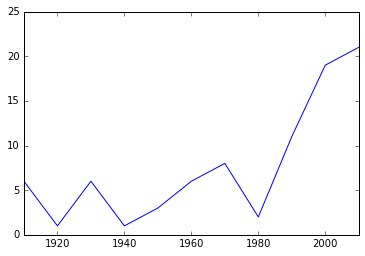

In [31]:
cast[cast.character == 'Hamlet'].decade.value_counts().sort_index().plot()

### What are the 11 most common character names in movie history?

In [38]:
cast.character.value_counts().sort_values(ascending = False).head(11)

Himself        18616
Dancer         11344
Extra           9341
Reporter        7733
Doctor          6991
Policeman       6593
Student         6548
Nurse           6253
Bartender       6211
Party Guest     6197
Minor Role      6060
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [40]:
cast[cast.character == 'Herself'].name.value_counts().sort_values(ascending = False).head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Mary Jo Pehl           7
Joan Rivers            7
Lili?n Garc?a          7
Rekha                  5
Hillary Clinton        5
Bunny Yeager           5
Lady Gaga              5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [41]:
cast[cast.character == 'Himself'].name.value_counts().sort_values(ascending = False).head(10)

Adolf Hitler             95
Richard Nixon            42
Ronald Reagan            33
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           20
Franklin D. Roosevelt    20
Winston Churchill        20
Bill Clinton             20
Martin Luther King       19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [43]:
cast[cast.year == 1945].name.value_counts().sort_values(ascending = False).head(1)

Emmett Vogan    39
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [65]:
cast[cast.year == 1985].name.value_counts().sort_values(ascending = False).head(10)

Mammootty        20
Shakti Kapoor    19
Sukumari         18
Lou Scheimer     15
Raj Babbar       14
Mohanlal         14
Aruna Irani      14
Deven Verma      13
Rajesh Khanna    13
Om Shivpuri      12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

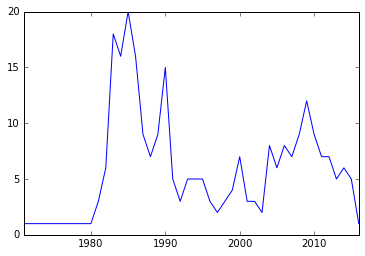

In [45]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [49]:
cast[cast.character.str.startswith('Patron in')].character.value_counts().sort_values(ascending = False).head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [50]:
cast[cast.character.str.startswith('Science')].character.value_counts().sort_values(ascending = False).head(10)

Science Teacher         55
Science Fair Student     9
Science Student          9
Science Fair Judge       5
Science Club Member      5
Science Reporter         5
Science Promo Cadet      4
Science Kid              4
Science Fair Kid         3
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

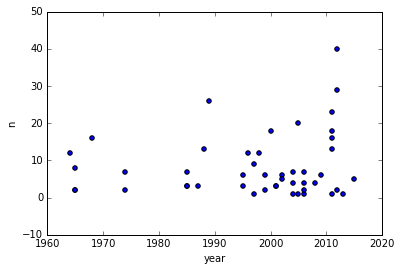

In [70]:
c = cast
c = c[c.name == 'Judi Dench'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

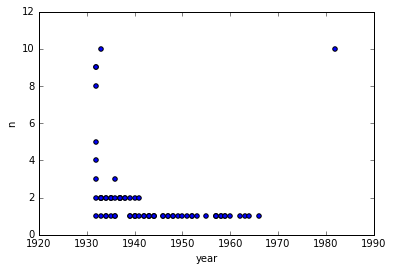

In [71]:
c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

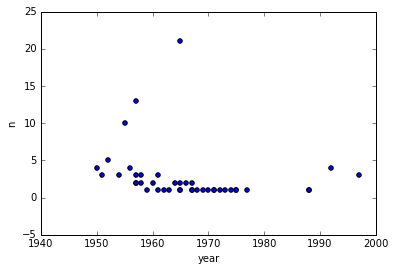

In [72]:
c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [74]:
cast[(cast.n == 1) & (cast.decade == 1950)].type.value_counts()

actor      6432
actress    2859
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [75]:
cast[(cast.n == 2) & (cast.decade == 1950)].type.value_counts()

actress    4437
actor      4432
Name: type, dtype: int64